# Predicting 'GPS Speed' of Truck 2

#### Imports and global variables are defined here.

In [1]:
# Imports required for this notebook.
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import scipy.stats as stats
import seaborn as sns

# Local path to the CSV file containing the data for truck one (1).
truckOnePath = "../data/trucks/truck1.csv"

# Local path to the CSV file containing the data for truck two (2).
truckTwoPath = "../data/trucks/truck2.csv"

#### Functions are defined here.

In [2]:
"""Uses Pandas's read_csv method to read a CSV file and returns a DataFrame of it to the notebook.
This function reads in all rows and defines the header row at index 0 by default."""
def readCsv(truck, records = None, headerIdx = 0):
    return pd.read_csv(truck, nrows = records, header = [headerIdx])

"""Takes a data frame of a truck (with inaccurate data) and the mean difference of a 
different truck (with accurate data) in order to attempt to predict or correct the GPS Speed value."""
def correctGps(truckDf, meanDiff):
    for i in truckDf:
        truckDf['CorrectedGpsSpeed'] = truckDf['WheelBasedVehicleSpeed'] + meanDiff
        
    return truckDf

#### Predicting GPS Speed for Truck 2

Based on our previous statistics, it is clear that the GPS Speed for Truck 2 is incorrect. Perhaps the component was broken, or maybe it was set to a different unit. Either way, it is not consistent with the Wheel-Based Vehicle Speed (which appears to be working correctly) and it is not consistent with the trends found in Truck 1, where both components were measuring relatively similar speeds at any given time.

In an attempt to rectify this, we will be using data from Truck 1 and analytically predict the GPS Speed values for Truck 2 given its Wheel-Based Vehicle Speed values.

In [3]:
# Read in the data for Truck 1.
truckOneDf = readCsv(truckOnePath)
truckOneDf = truckOneDf.ffill().bfill()

# Read in the data for Truck 2.
truckTwoDf = readCsv(truckTwoPath)
truckTwoDf = truckTwoDf.ffill().bfill()

To decide how to correct Truck 2's GPS Speed, we need to find the difference between the two components for Truck 1.

In [4]:
# Subtract the values of Wheel-Based Vehicle Speed from GPS Speed for Truck 1.
truckOneDiff = truckOneDf['GPS speed'].sub(truckOneDf['WheelBasedVehicleSpeed'])

# Calculate the average difference between all of the points of difference.
truckOneDiffMean = truckOneDiff.mean()

# Print the average difference of both components for Truck 1.
print(truckOneDiffMean)

-0.28539807628549124


Notice that the value is a negative number. This indicates that the GPS Speed component is, on average, reading a slightly higher value than the Wheel-Based Vehicle Speed component. Therefore, to begin predicting, or "correcting", the GPS Speed for Truck 2, we can start by simply adding that average to any given Wheel-Based Vehicle Speed value for Truck 2.

We will use the function defined in the functions section of this notebook.

In [5]:
correctedTruckTwoDf = correctGps(truckTwoDf, truckOneDiffMean)

Since it would be impractical to verify that each estimate is accurate, we will use the means of each component. Using matplotlib, we can visually see the average values for the Wheel-Based Speed and Corrected GPS Speed. They are appearing very close together, as expected.

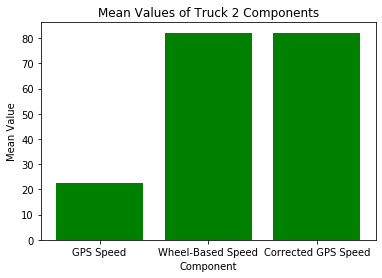

In [6]:
correctedGpsMean = correctedTruckTwoDf['CorrectedGpsSpeed'].mean()
wheelMean = correctedTruckTwoDf['WheelBasedVehicleSpeed'].mean()
gpsMean = correctedTruckTwoDf['GPS speed'].mean()

x = ['GPS Speed', 'Wheel-Based Speed', 'Corrected GPS Speed']
meanCollection = [gpsMean, wheelMean, correctedGpsMean]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, meanCollection, color='green')

plt.xlabel("Component")
plt.ylabel("Mean Value")
plt.title("Mean Values of Truck 2 Components")

plt.xticks(x_pos, x)

plt.show()

These are the raw values for those components to get an exact amount.

In [7]:
truckTwoSpeedDiffAvg = wheelMean - correctedGpsMean

print("GPS Speed Mean: " + str(gpsMean))
print("Wheel-Based Speed Mean: " + str(wheelMean))
print("Corrected GPS Speed Mean: " + str(correctedGpsMean))

GPS Speed Mean: 22.685516192007974
Wheel-Based Speed Mean: 82.13312230404554
Corrected GPS Speed Mean: 81.84772422776032


To see how well this worked, let's take a look at the data for Truck 1.

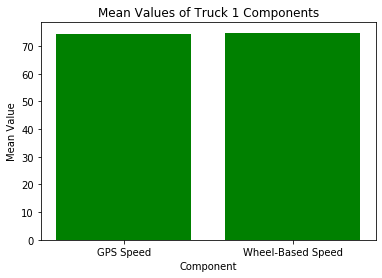

In [8]:
wheelMean = truckOneDf['WheelBasedVehicleSpeed'].mean()
gpsMean = truckOneDf['GPS speed'].mean()

x = ['GPS Speed', 'Wheel-Based Speed']
meanCollection = [gpsMean, wheelMean]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, meanCollection, color='green')

plt.xlabel("Component")
plt.ylabel("Mean Value")
plt.title("Mean Values of Truck 1 Components")

plt.xticks(x_pos, x)

plt.show()

These are the raw values for the working components on Truck 1.

In [9]:
truckOneSpeedDiffAvg = wheelMean - gpsMean

print("GPS Speed Mean: " + str(gpsMean))
print("Wheel-Based Speed Mean: " + str(wheelMean))

GPS Speed Mean: 74.5450583567317
Wheel-Based Speed Mean: 74.83045643301719


As we can see, the differences in these values are relatively the same with GPS Speed reading slightly lower than Wheel-Based Speed, on average. This is consistent between Truck 1 and the corrected values of Truck 2. Again, since it is impractical to verify the validity of each individual reading, we are forced to look at averages. Overall, the estimates appear to be quite tight but fairly consistent.